# Observations
1.  Pyber is used the least amount in rural cities; however,rural cities have some of the highest on avg fares.
2.  Urban areas have the highest amount of Pyber drivers and account for more than 60% of Pybers total fares. 
3.  Suburban cities make up less than a third of Pyber's total fares.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sci

In [2]:
#import csv file
file_city = '../10-16-2017-GW-Arlington-Class-Repository-DATA/Homework/05-Matplotlib/Instructions/Pyber/raw_data/city_data.csv'
file_ride = '../10-16-2017-GW-Arlington-Class-Repository-DATA/Homework/05-Matplotlib/Instructions/Pyber/raw_data/ride_data.csv'
df_city = pd.read_csv(file_city)
df_ride = pd.read_csv(file_ride)
df_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
#Merge dfs
df_merge = df_city.merge(df_ride, on='city', how='outer')
df_merge.columns.values


array(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype=object)

In [4]:
#Group by city, driver_count, type
df_grpmerge = df_merge.groupby(['city', 'driver_count','type'])
df_grpmerge.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
28,Nguyenbury,8,Urban,2016-07-09 04:42:44,6.28,1543057793673
29,Nguyenbury,8,Urban,2016-11-08 19:22:04,19.49,1702803950740
30,Nguyenbury,8,Urban,2016-03-19 13:08:09,35.07,9198401002936
31,Nguyenbury,8,Urban,2016-05-12 15:57:15,41.63,224683791660
32,Nguyenbury,8,Urban,2016-04-07 06:59:51,19.01,4648481871830


In [5]:
#get data for bubble plot
df_bubble = df_grpmerge['fare'].mean()
df_bubble = pd.DataFrame(df_bubble)
df_bubble['ride_count'] = pd.DataFrame(df_grpmerge['ride_id'].count())

#Clean Up
df_bubble = df_bubble.rename(columns={'fare':'avg_fare'})
df_bubble = df_bubble.reset_index()
df_bubble.head()

,city,driver_count,type,avg_fare,ride_count
0,Alvarezhaven,21,Urban,23.928710,31
1,Alyssaberg,67,Urban,20.609615,26
2,Anitamouth,16,Suburban,37.315556,9
3,Antoniomouth,21,Urban,23.625000,22
4,Aprilchester,49,Urban,21.981579,19


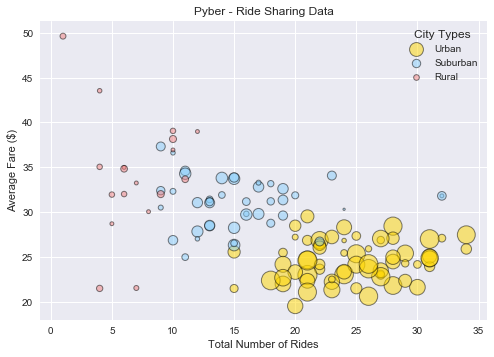

In [6]:
#Bubble Plot
df_rural = df_bubble.loc[df_bubble['type'] == 'Rural']
df_urban = df_bubble.loc[df_bubble['type'] == 'Urban']
df_suburban = df_bubble.loc[df_bubble['type'] == 'Suburban']

fig, ax = plt.subplots(sharex=True)

df_urban.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare',s=df_urban.driver_count*5, 
              c='Gold', ax=ax, label='Urban', alpha=0.5, edgecolors='black',linewidth=1)
df_suburban.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare',s=df_suburban.driver_count*5,
                 c='lightskyblue', ax=ax,label = 'Suburban',alpha = 0.5, edgecolors='black',linewidth=1)
df_rural.plot(kind='scatter', subplots=True, x='ride_count',y='avg_fare',s=df_rural.driver_count*5,
              c='lightcoral', ax=ax, label = 'Rural',alpha=0.5, edgecolors='black',linewidth=1)

#plt.scatter(df_bubble['ride_count'].loc['type']=='urban',df_bubble['avg_fare'].loc['type']=='urban',
#            s=df_bubble['driver_count'].loc['type']=='urban',)
plt.xlabel('Total Number of Rides')
plt.ylabel('Average Fare ($)')
plt.title('Pyber - Ride Sharing Data')
plt.legend(loc='best',title='City Types')
plt.savefig('HW5_Plot.png')
plt.show()

In [7]:
#Create Pie Charts - Inital Setup
df_pie = df_merge[['type', 'fare','driver_count','ride_id']]

#Pie Group by 
df_piegrp = df_pie.groupby('type')

#Pie series
df_pierides = pd.DataFrame(df_piegrp['ride_id'].count())
df_pierides = df_pierides.reset_index()
df_pierides = df_pierides.rename(columns={'ride_id':'Total Rides Taken'})

df_piedrivers = pd.DataFrame(df_piegrp['driver_count'].sum())
df_piedrivers = df_piedrivers.reset_index()
df_piedrivers = df_piedrivers.rename(columns={'driver_count':'Pyber Drivers'})

df_piefares = pd.DataFrame(df_piegrp['fare'].sum())
df_piefares = df_piefares.reset_index()
df_piefares = df_piefares.rename(columns={'fare':'Total Fares'})

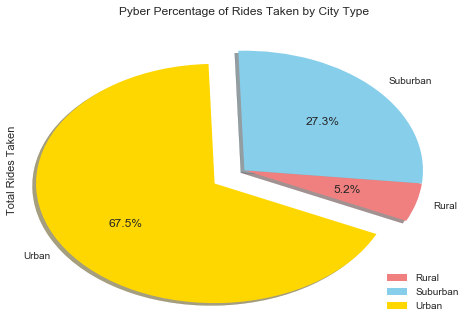

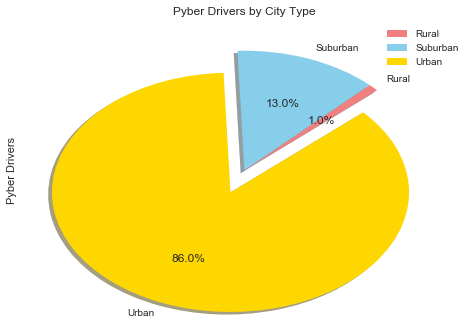

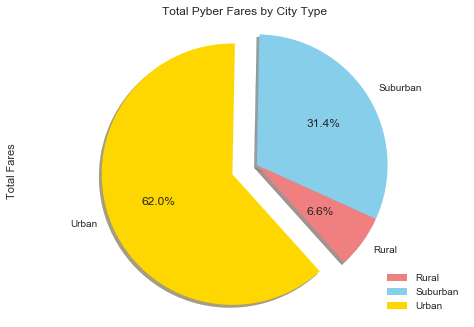

In [21]:
#create Pie Charts - Plots
df_pierides.plot(kind='pie',y='Total Rides Taken',labels=df_pierides['type'],explode = (0,0,.2),
                 autopct='%1.1f%%', shadow=True, startangle=-25, colors = ['lightcoral','skyblue','gold'], 
                title = 'Pyber Percentage of Rides Taken by City Type')

df_piedrivers.plot(kind='pie',y='Pyber Drivers',labels=df_pierides['type'],explode = (0,0,.2),
                 autopct='%1.1f%%', shadow=True, startangle=42, colors = ['lightcoral','skyblue','gold'],
                  title = 'Pyber Drivers by City Type')

df_piefares.plot(kind='pie',y='Total Fares',labels=df_pierides['type'],explode = (0,0,.2),
                 autopct='%1.1f%%', shadow=True, startangle=-48, colors = ['lightcoral','skyblue','gold'],
                  title = 'Total Pyber Fares by City Type')

plt.axis('equal')
plt.show()
